# Programa de créditos FOVISSSTE 2024

El presente notebook tiene como objetivo hacer estimaciones sencillas sobre la distribución de los créditos del programa de créditos FOVISSSTE 2024. Para ello, se hace uso de la API del SNIIV para obtener información sobre la distribución de los créditos por mes, entidad federativa, sexo y rango salarial.

In [138]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import geopandas as gpd

In [139]:
def consulta(variables):

    base_url = "https://qa-sniiv.sedatu.gob.mx/api/CuboAPI/GetFOVISSSTE/2015,2023/0/0/"
    variables_str = ','.join(map(str, variables))
    
    # url final
    final_url = base_url + variables_str
    
    
    response = requests.get(final_url)
    data = response.json()
    df = pd.DataFrame(data)
    
    return df

In [140]:
def participaciones(df, value_column, groupby_columns):
    group_sums = df.groupby(groupby_columns)[value_column].transform('sum')
    df['percentage'] = (df[value_column] / group_sums) * 100
    return df

### Datos del programa de créditos Fovissste 2024

In [141]:
limite_inferior=47477
limite_superior=56297

## Consulta por mes

In [142]:
mes = participaciones(consulta(['anio','mes']),'acciones',['año'])
mes = mes.groupby('mes')['percentage'].mean().reset_index()
mes['distr'] = round((mes['percentage'] / 100) * limite_superior,0)
mes["distr"].sum()

56296.0

In [143]:
#Hacer una variable numérica 
mes["mes_num"]=mes["mes"].map({'enero':1, 'febrero':2, 'marzo':3, 'abril':4, 'mayo':5, 'junio':6, 'julio':7, 'agosto':8, 'septiembre':9, 'octubre':10, 'noviembre':11, 'diciembre':12})
#Ordenar por mes
mes=mes.sort_values(by='mes_num')
mes

,mes,percentage,distr,mes_num
3,enero,6.064475,3414.0,1
4,febrero,6.172422,3475.0,2
7,marzo,8.735112,4918.0,3
0,abril,7.383575,4157.0,4
8,mayo,8.904931,5013.0,5
6,junio,9.164560,5159.0,6
5,julio,8.405893,4732.0,7
1,agosto,7.958307,4480.0,8
11,septiembre,7.114178,4005.0,9
10,octubre,8.041825,4527.0,10


Text(-2, -7, 'Fuente: SEDATU. Dirección General de Desarrollo Urbano, Suelo y Vivienda. Estimaciones propias con información del Programa de Crédito 2024 del FOVISSSTE y del SNIIV.')

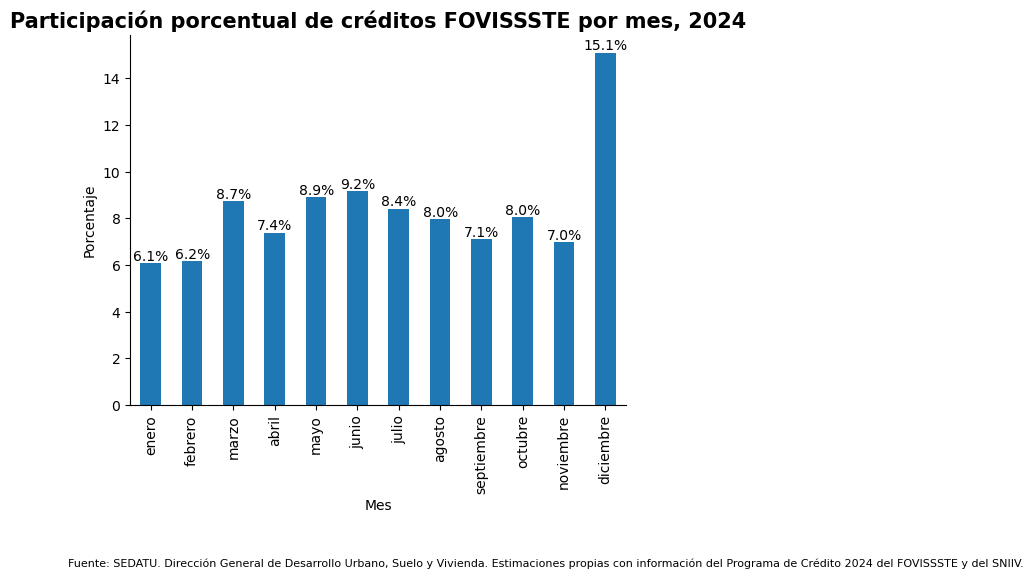

In [144]:
# Gráfica de barras de percentaje de participación por mes
fig, ax = plt.subplots()
mes.plot(kind='bar', x='mes', y='percentage', ax=ax)
#Título
plt.title('Participación porcentual de créditos FOVISSSTE por mes, 2024', fontsize=15, weight='bold')
#Etiquetas de los ejes
plt.xlabel('Mes')
plt.ylabel('Porcentaje')
#Eliminar marco izquierdo y superior
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.get_legend().remove()
#Poner etiquetas en las barras
for index, value in enumerate(mes['percentage']):
    plt.text(index, value, str(round(value,1)) + '%', ha = 'center', va = 'bottom')
#Fuente del gráfico
plt.text(-2, -7,  'Fuente: SEDATU. Dirección General de Desarrollo Urbano, Suelo y Vivienda. Estimaciones propias con información del '
                'Programa de Crédito 2024 del FOVISSSTE y del SNIIV.', ha = 'left', va = 'bottom', fontsize=8)

## Consulta por entidad federativa

In [145]:
entidad = participaciones(consulta(['anio','estado']),'acciones',['año'])
#Porcentaje promedio por entidad
entidad = entidad.groupby('estado')['percentage'].mean().reset_index()
entidad['distr'] = round((entidad['percentage'] / 100) * limite_superior,0)
entidad["distr"].sum()

56298.0

## Consulta por sexo


In [146]:
sexo = participaciones(consulta(['anio','genero']),'acciones',['año'])
#Porcentaje promedio por entidad
sexo=sexo.groupby('sexo')['percentage'].mean().reset_index()
#Aplicar percentaje de participación al limite superior
sexo['distr'] = round((sexo['percentage'] / 100) * limite_superior,0)
sexo['distr'].sum()
sexo

,sexo,percentage,distr
0,Hombre,44.039736,24793.0
1,Mujer,55.960264,31504.0


Text(-1, -16, 'Fuente: SEDATU. Dirección General de Desarrollo Urbano, Suelo y Vivienda. Estimaciones propias con información del Programa de Crédito 2024 del FOVISSSTE y del SNIIV.')

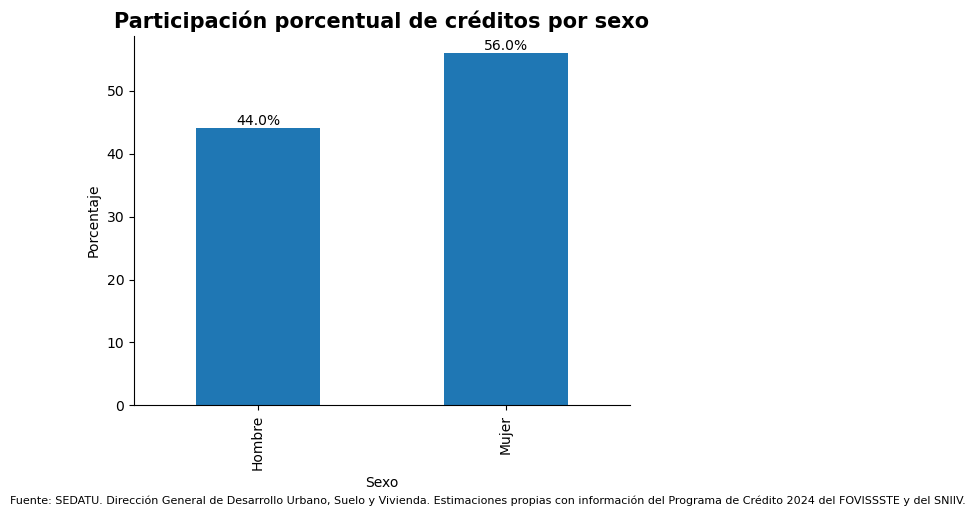

In [147]:
# Gráfica de barras de percentaje de participación por sexo
fig, ax = plt.subplots()
sexo.plot(kind='bar', x='sexo', y='percentage', ax=ax)
#Título
plt.title('Participación porcentual de créditos por sexo', fontsize=15, weight='bold')
#Etiquetas de los ejes
plt.xlabel('Sexo')
plt.ylabel('Porcentaje')
#Eliminar marco izquierdo y superior
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#Eliminar leyenda
ax.get_legend().remove()
#Poner etiquetas en las barras
for index, value in enumerate(sexo['percentage']):
    plt.text(index, value, str(round(value,1)) + '%', ha = 'center', va = 'bottom')
    
#Fuente del gráfico
plt.text(-1, -16, 'Fuente: SEDATU. Dirección General de Desarrollo Urbano, Suelo y Vivienda. Estimaciones propias con información del '
                'Programa de Crédito 2024 del FOVISSSTE y del SNIIV.', ha = 'left', va = 'bottom', fontsize=8)

## Consulta por rango de ingreso y valor de la vivienda

In [148]:
salario = participaciones(consulta(['anio','rango_salarial',"valor_vivienda"]),'acciones',['año'])
salario

,año,rango_salarial,valor_vivienda,acciones,monto,percentage
0,2015,No disponible,No disponible,2,0.000000e+00,0.002469
1,2015,2.6 o menos,No disponible,1966,0.000000e+00,2.426621
2,2015,2.6 o menos,Económica,10,1.660124e+06,0.012343
3,2015,2.6 o menos,Popular,1958,6.463732e+08,2.416747
4,2015,2.6 o menos,Tradicional,1068,3.894369e+08,1.318226
...,...,...,...,...,...,...
300,2023,9.01 a 12.00,Residencial plus,91,4.198747e+07,0.248369
301,2023,Más de 12,Tradicional,32,1.055003e+07,0.087339
302,2023,Más de 12,Media,164,1.390317e+08,0.447610
303,2023,Más de 12,Residencial,62,2.211546e+07,0.169219
